In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import os
import calendar
import string
%matplotlib inline

In [2]:
# set e3sm
e3sm_root = '/global/homes/q/qingli/project/cmip6_projection/data'
e3smcase_list = [
    '20180215.DECKv1b_H1.ne30_oEC.edison',
    '20180220.DECKv1b_H2.ne30_oEC.edison',
    '20180302.DECKv1b_H3.ne30_oEC.edison',
    '20180305.DECKv1b_H4.ne30_oEC.edison',
    '20180307.DECKv1b_H5.ne30_oEC.edison',
    '20190404.DECKv1b_H1_hist-GHG.ne30_oEC.edison',
    '20190404.DECKv1b_H2_hist-GHG.ne30_oEC.edison',
    '20190404.DECKv1b_H3_hist-GHG.ne30_oEC.edison',
    ]
varname = 'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceTemperature'
filename = 'mpasTimeSeriesOcean.nc'
            

In [3]:
# load e3sm data
ne3smcase = len(e3smcase_list)
f_init = False
for i in np.arange(ne3smcase):
    infile = e3sm_root+'/mpas_analysis_processed/'+e3smcase_list[i]+'/timeseries/'+filename
    print('Opening file {:}...'.format(infile))
    dset = xr.open_dataset(infile)
    if not f_init:
        e3sm_time = dset.Time
        e3sm_ntime = e3sm_time.size
        e3sm_data = np.zeros([ne3smcase, e3sm_ntime])
        f_init = True
    ntime = dset.Time.size
    e3sm_data[i,0:ntime] = dset.variables[varname][0:,-1]
    if ntime < e3sm_ntime:
        e3sm_data[i,ntime:] = np.nan

Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180215.DECKv1b_H1.ne30_oEC.edison/timeseries/mpasTimeSeriesOcean.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180220.DECKv1b_H2.ne30_oEC.edison/timeseries/mpasTimeSeriesOcean.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180302.DECKv1b_H3.ne30_oEC.edison/timeseries/mpasTimeSeriesOcean.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180305.DECKv1b_H4.ne30_oEC.edison/timeseries/mpasTimeSeriesOcean.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180307.DECKv1b_H5.ne30_oEC.edison/timeseries/mpasTimeSeriesOcean.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20190404.DECKv1b_H1_hist-GHG.ne30_oEC.edison/timeseries/mpasTimeSeriesOcean.nc...
Opening file 

In [4]:
# fix an issue of all zero temperature at time index = 1022 in 20180220.DECKv1b_H2.ne30_oEC.edison
e3sm_data[1,1022] = 0.5*(e3sm_data[1,1021]+e3sm_data[1,1023])

In [5]:
# monthly to annually
time = np.linspace(1850,2014,165)
ntime = len(time)
e3sm_data_ann = np.zeros([ne3smcase, ntime])
for i in np.arange(ntime):
    e3sm_data_ann[:,i] = np.mean(e3sm_data[:,i*12:(i+1)*12], axis=1)
    

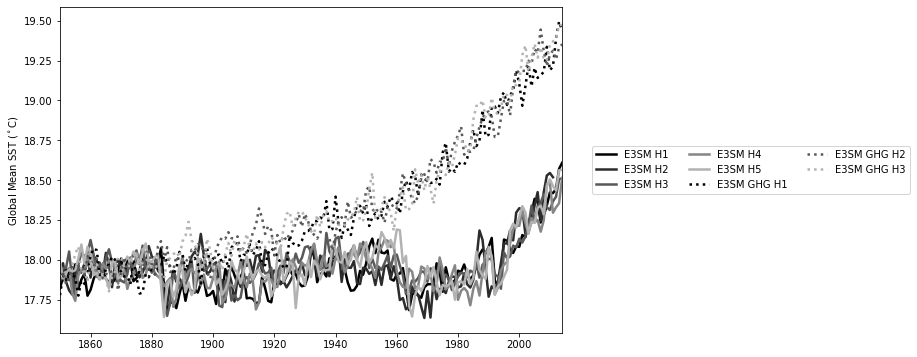

In [6]:
cmap2 = cm.get_cmap('gray')
# ifrac2 = np.linspace(0,0.7,ne3smcase)
ifrac2 = np.linspace(0,0.7,5)
ifrac3 = np.linspace(0,0.7,ne3smcase-5)

fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
ax.set_ylabel('Global Mean SST ($^\circ$C)')
e3sm_label = []
for k in np.arange(ne3smcase):
    if k <= 4:
        label = 'E3SM H{:d}'.format(k+1)
        ax.plot(time, e3sm_data_ann[k,:], \
                color=cmap2(ifrac2[k]), linewidth=2.5, label=label)
    else:
        label = 'E3SM GHG H{:d}'.format(k-4)
        ax.plot(time, e3sm_data_ann[k,:], \
                color=cmap2(ifrac3[k-5]), linestyle='dotted', \
                linewidth=2.5, label=label)
    e3sm_label.append(label)
            
ax.set_xlim([time[0], time[-1]])
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=3)


In [7]:
np.savez('e3sm_sst_historical.npz', data=e3sm_data_ann, time=time, label=e3sm_label)